# 1.3	Employee Well-Being Dataset 

In [13]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
# reading the CSV file into a pandas dataframe
df = pd.read_csv("employee_wellbeing.csv")

# displaying all column names
print(df.columns)

Index(['EMP_ID', 'AGE', 'GENDER', 'STATUS', 'EMPLOYMENT', 'SUFFICIENT_INCOME',
       'SALARY', 'TO_DO_COMPLETED', 'DAILY_STRESS', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'FLOW',
       'DAILY_STEPS', 'SLEEP_HOURS', 'LOST_VACATION', 'PERSONAL_AWARDS',
       'TIME_FOR_HOBBY', 'HEALTHY_DIET', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')


In [15]:
# check for any missing values in the data and drop 'EMP_ID' column adi t is irrelevant for analysis
df.isnull().values.any()
df= df.drop(columns=['EMP_ID'], axis = 1)

df_encoder = LabelEncoder()
for i in range(20):
    if df.iloc[:,i].dtype == 'object':
        df.iloc[:,i] = df_encoder.fit_transform(df.iloc[:,i])
df.head()

,AGE,GENDER,STATUS,EMPLOYMENT,SUFFICIENT_INCOME,SALARY,TO_DO_COMPLETED,DAILY_STRESS,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,FLOW,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_HOBBY,HEALTHY_DIET,WORK_LIFE_BALANCE_SCORE
0,1,0,0,1,1,1,6,2,5,0,5,2,4,5,7,5,4,0,3,609.5
1,1,0,2,0,2,0,5,3,3,8,10,5,2,5,8,2,3,2,2,655.6
2,1,0,2,0,2,0,2,3,4,4,10,3,2,4,8,10,4,8,2,631.6
3,2,0,2,0,1,2,3,3,3,10,7,2,5,5,5,7,5,2,3,622.7
4,2,0,1,0,1,1,5,1,3,10,4,2,0,5,7,0,8,1,5,663.9


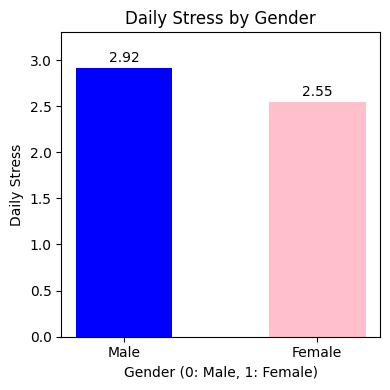

In [16]:
# Group by 'GENDER' and calculate the mean of 'DAILY_STRESS'
gender_stress_mean = df.groupby('GENDER')['DAILY_STRESS'].mean()

# Plot bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bar_width = 0.5
bar_positions = np.arange(len(gender_stress_mean))

ax.bar(bar_positions, gender_stress_mean, width=bar_width, color=['blue', 'pink'])

# Annotate each bar with its magnitude
for i, value in enumerate(gender_stress_mean):
    ax.text(i, value + 0.1, f"{value:.2f}", ha='center', va='center')

ax.set_xticks(bar_positions)
ax.set_xticklabels(['Male', 'Female'])
ax.set_title('Daily Stress by Gender')
ax.set_xlabel('Gender (0: Male, 1: Female)')
ax.set_ylabel('Daily Stress')
ax.set_ylim(0, 3.3)

plt.tight_layout()
plt.show()


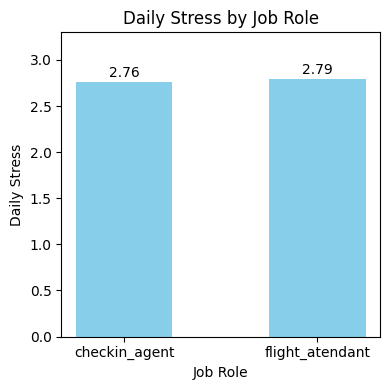

In [17]:
# Group by 'EMPLOYMENT' and calculate the mean of 'DAILY_STRESS'
job_stress_mean = df.groupby('EMPLOYMENT')['DAILY_STRESS'].mean()

# Plot bar chart
fig, ax = plt.subplots(figsize=(4, 4))
bar_width = 0.5
bar_positions = np.arange(len(job_stress_mean))

ax.bar(bar_positions, job_stress_mean, width=bar_width, color='skyblue')

# Annotate each bar with its magnitude
for i, value in enumerate(job_stress_mean):
    ax.text(i, value + 0.1, f"{value:.2f}", ha='center', va='center')

ax.set_xticks(bar_positions)
ax.set_xticklabels(['checkin_agent','flight_atendant'])
ax.set_title('Daily Stress by Job Role')
ax.set_xlabel('Job Role')
ax.set_ylabel('Daily Stress')
ax.set_ylim(0, 3.3)

plt.tight_layout()
plt.show()


In [18]:
# Calculate the mean of 'TIME_FOR_HOBBY' grouped by 'GENDER'
gender_hobby_time_mean = df.groupby('GENDER')['TIME_FOR_HOBBY'].mean()

# Display the mean values
print("Mean Time for Hobby by Gender:")
print(gender_hobby_time_mean)


Mean Time for Hobby by Gender:
GENDER
0    3.202676
1    3.334009
Name: TIME_FOR_HOBBY, dtype: float64


In [19]:
# Factors with the Highest Impact on WORK_LIFE_BALANCE_SCORE
corr_mat = df.corr()
position = []
print("Columns with the highest impact on WORK_LIFE_BALANCE_SCORE:")
for column in corr_mat.columns:
    if column != 'WORK_LIFE_BALANCE_SCORE':
        if (corr_mat[column]['WORK_LIFE_BALANCE_SCORE'] > 0.09) or (corr_mat[column]['WORK_LIFE_BALANCE_SCORE'] < -0.09):
            if corr_mat[column]['WORK_LIFE_BALANCE_SCORE'] == 1:
                continue
            else:
                position.append(column)
                print(column, '=', corr_mat[column]['WORK_LIFE_BALANCE_SCORE'])

Columns with the highest impact on WORK_LIFE_BALANCE_SCORE:
AGE = 0.09199385597641332
SUFFICIENT_INCOME = 0.29481329713164744
SALARY = -0.26493993026980167
TO_DO_COMPLETED = 0.552218439271271
DAILY_STRESS = -0.36463487395974803
CORE_CIRCLE = 0.50479649677039
SUPPORTING_OTHERS = 0.5505493474781307
SOCIAL_NETWORK = 0.4120603490297315
ACHIEVEMENT = 0.5773849696677533
FLOW = 0.4837366506391596
DAILY_STEPS = 0.42868079914573903
SLEEP_HOURS = 0.19578563132024046
LOST_VACATION = -0.27029497357851584
PERSONAL_AWARDS = 0.5133261768718717
TIME_FOR_HOBBY = 0.5168612314679437
HEALTHY_DIET = 0.4425562997481686


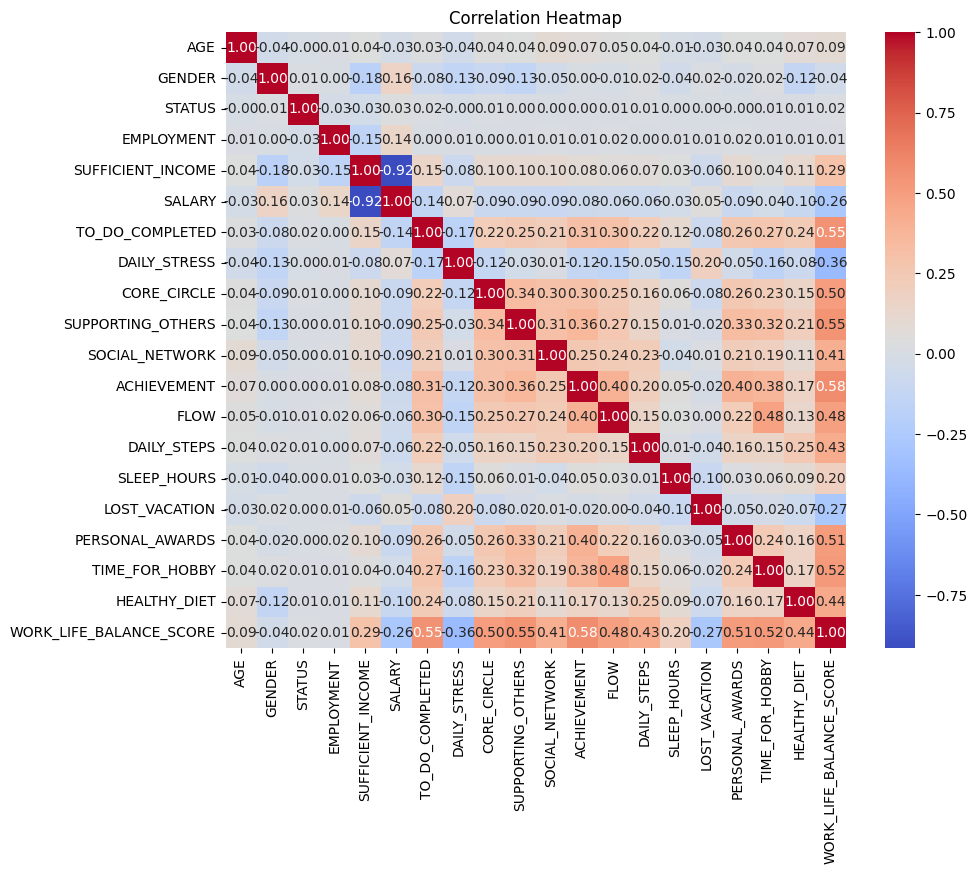

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 1.4	Predictive well-being Algorithm 

In [21]:
# Drop unnecessary columns for modeling
columns_to_drop = ['AGE', 'GENDER', 'STATUS', 'EMPLOYMENT']
df_model = df.drop(columns=columns_to_drop)

# Split the data into features (X) and target (y)
X = df_model.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
y = df_model['WORK_LIFE_BALANCE_SCORE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.8767169465412897


In [22]:
# Calculate the difference between real and predicted values
diff_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff_df['Difference'] = diff_df['Actual'] - diff_df['Predicted']

# Display the differences in a tabular form
print("Tabular Form of Differences:")
diff_df.head()


Tabular Form of Differences:


,Actual,Predicted,Difference
6252,600.6,596.045964,4.554036
4684,645.6,654.767473,-9.167473
1731,671.7,666.093179,5.606821
4742,707.4,696.148910,11.251090
4521,723.4,720.746745,2.653255


Text(0.5, 1.0, 'Actual vs. Predicted')

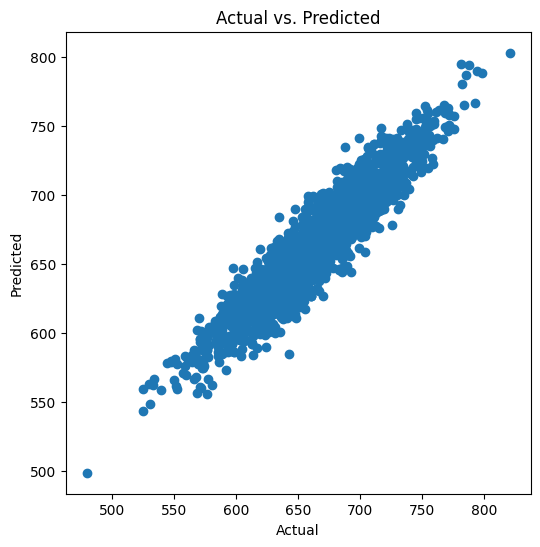

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [24]:
# Create a new record for prediction
new_record = pd.DataFrame({
    'SUFFICIENT_INCOME': [1],
    'SALARY': [2],
    'TO_DO_COMPLETED': [6],
    'DAILY_STRESS': [5],
    'CORE_CIRCLE': [7],
    'SUPPORTING_OTHERS': [4],
    'SOCIAL_NETWORK': [4],
    'ACHIEVEMENT': [3],
    'FLOW': [6],
    'DAILY_STEPS': [7],
    'SLEEP_HOURS': [7],
    'LOST_VACATION': [0],
    'PERSONAL_AWARDS': [3],
    'TIME_FOR_HOBBY': [10],
    'HEALTHY_DIET': [1]
})

# Make predictions for the new record
new_record_pred = model.predict(new_record)

# Display the predicted WLB score for the new record
print(f"Predicted WLB Score for the New Record: {new_record_pred[0]:.2f}")


Predicted WLB Score for the New Record: 653.51
